<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Ames, Iowa Housing: Data Analysis and Recommendations

# Problem Statement

Zillow will often indicate 'Estimated Home Price' to inform users about the market rates of homes, even if they are not yet explicitly for sale. More accurate depictions of home values translates to confidence in Zillow's product, and, therefore, user base expansion.

Build a Multiple Linear Regression Model that will make the best possible predictions of home values in Ames, Iowa using the provided dataset from Zillow. The model will be evaluated using an r-squared score as well as cross val score. 

Users could effectively utilize our model to predict home values and increase confidence in estimated home costs. 

# Executive Summary

The importance of proper data cleaning, munging, wrangling, manipulation cannot be overstated. The preponderance of data columns, or features, the amount of errors or null values, required careful selection and aggregation in order to arrive at accurate housing price predictions. 

# Contents:

- [Data Dictionary](#Data-Dictionary)
- [Import All Relevent Libraries](#Import-All-Relevant-Libraries)
- [Load Our Data](#Load-Our-Data)
- [Initial Data Cleaning and Munging](#Initial-Data-Cleaning-And-Munging)
- [Addressing Null Values](#Addressing-Null-Values)
- [Feature Engineering](#Feature-Engineering)
- [Modelling and Fitting](#Modelling-and-Fitting)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data Dictionary

A data description was provided and can be found here: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

All features listed below were engineered for both training and testing datasets.

|Feature|Type|Description|
|---|---|---|
|**age**|*int*| Age of the house when it was sold 
|**total_fin_sf**|*int*| Total living area 'under HVAC' 
|**total_baths**|*float*| Total number of bathrooms including half-baths (0.5)
|**good_features**|*float*| Count of good or positive features 
|**bad_features**|*float*| Count of bad or negative features

<a id='Data_Dictionary'></a>

<a id='Import-All-Relevant-Libraries'></a>
## Import All Relevant Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

<a id='Load-Our-Data'></a>
### Load Our Data:

In [2]:
# Read in both our testing and training data
ames = pd.read_csv('../Datasets/Raw_Data/train.csv')
ames_test = pd.read_csv('../Datasets/Raw_Data/test.csv')

In [3]:
# Since we have so many rows/columns pandas has a function to limit display. 
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

<a id='Initial-Data-Cleaning-And-Munging'></a>
## Initial Data Cleaning and Munging:

In [4]:
# Our training dataframe has 2051 rows and 81 columns. That's a lot of potential features. 
# We have to determine which columns are important to include as our features in our linear regression models. 
ames.shape

(2051, 81)

In [5]:
ames_test.shape

(879, 80)

In [6]:
# Need to change our column names to exclude spaces and create uniform underscores and lowercase
ames.columns = ames.columns.map(lambda x: x.lower().replace(' ', '_'))
ames_test.columns = ames_test.columns.map(lambda x: x.lower().replace(' ', '_'))

In [7]:
# Based on looking at these columns and the provided data dictionary; 
# there will most likely be a lot of collinearity. 
ames.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

## Checking for empty or null values. 
 'Lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf',
 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish',
 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'pool_qc', 'fence', and 'misc_feature' 
### All of these columns have some level of null data. Personal experience dictates that the presence of a quality pool, finished garage, and a finished, livable, basement affect housing costs. 

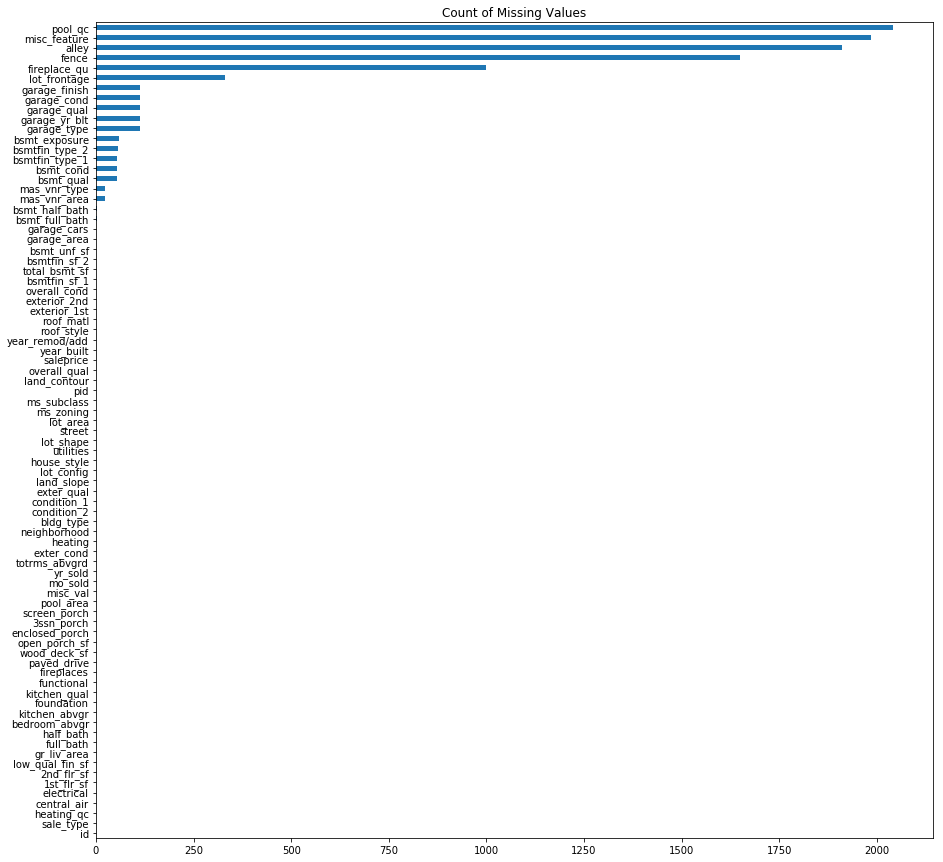

In [8]:
# Going to delete the 'lot_frontage' and 'garage_yr_blt'. 'Pool_qc', 'fireplace_qu' will be engineered

plt.figure(figsize=(15, 15))
ames.isna().sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Count of Missing Values');

In [9]:
ames.isna().sum().sort_values(ascending=False).head(27)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
total_bsmt_sf        1
bsmtfin_sf_1         1
overall_cond         0
dtype: int64

In [10]:
# As usual, there are several columns that need to converted into numerical, or dummy, variables. 

ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [11]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


### Check for Outliers in Above Grade (Ground) Living Area feature

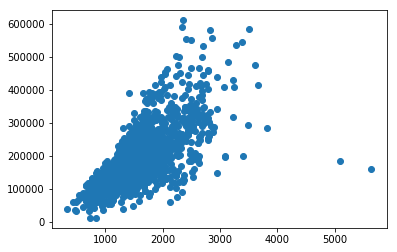

In [12]:
# Checking for outliers in the above ground living area since it's a closely correlated variable to price
plt.scatter(x = ames['gr_liv_area'], y = ames['saleprice']);

In [13]:
# Removed the two outlier rows since they're probably not indicative of normal sales price v gr_live_area
ames.drop([960, 1885], inplace = True)

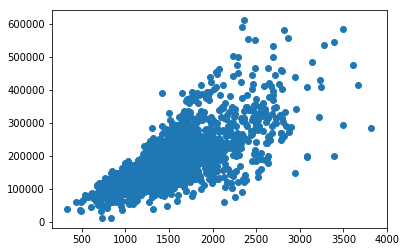

In [14]:
plt.scatter(x = ames['gr_liv_area'], y = ames['saleprice']);

### Checking for Outliers in Overall Quality feature

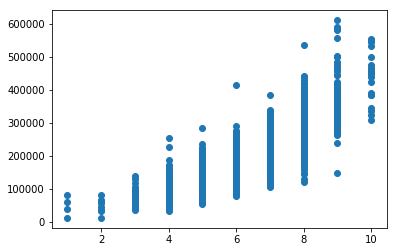

In [15]:
# Checking for outliers in the overall quality feature since it's a closely correlated variable to price
# Because of the broad generalization that is the 'overall_qual' feature the anomalies will be kept
plt.scatter(x = ames['overall_qual'], y = ames['saleprice']);

### Check for correlation using a heatmap. 

Strong positive correlations in 'overall_qual', 'gr_living_area', 'garage_area', 'garage_cars', 'total_bsmt_sf', 'year_built',
'1st_flr_sf', 'year_remod/add', 'full_bath', and 'garage_yr_built'. 

There appear to be no strong negative correlations. 

### Taken as individual features these correlations might not have a strong impact on our target ('saleprice').

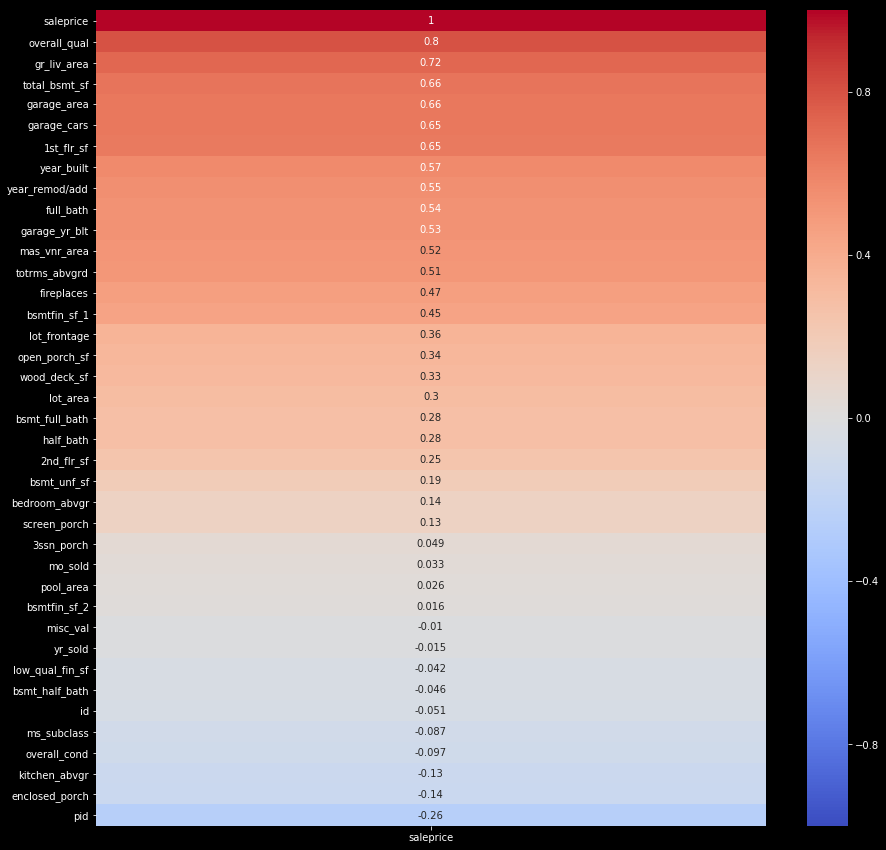

In [16]:
# Thanks to Kate Dowdy for the code for the readable heatmap. 

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 15))
plt.fontsize = 27
sns.heatmap(ames.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);

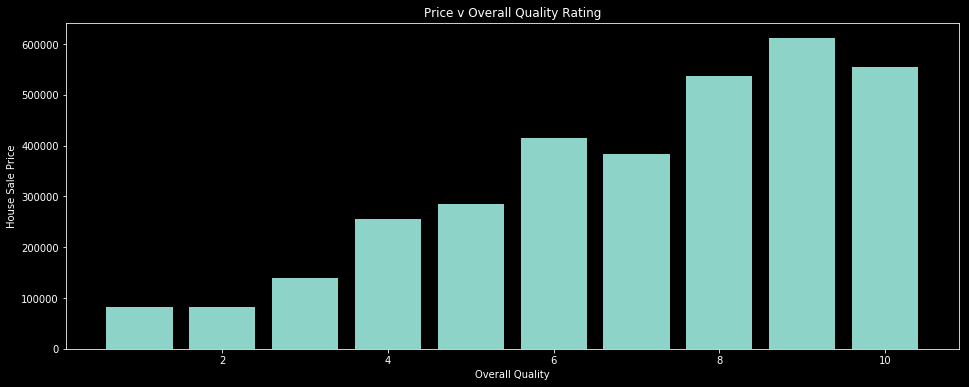

In [17]:
# Let's take what appears to our strongest correlation and plot it against sale price. 
plt.style.use('dark_background')
plt.figure(figsize=(16, 6))
plt.bar(ames['overall_qual'], ames['saleprice'])
plt.xlabel('Overall Quality')
plt.ylabel('House Sale Price')
plt.title('Price v Overall Quality Rating');

<a id='Addressing-Null-Values'></a>
## Addressing Null Values:

Addressing columns with quality ratings. Columns with nominal values from Poor - Excellent. Assigned ordinal values from 1 - 5. NaN in these columns indicates the feature is not present so they were assigned with a zero value. 
This process is important later as the columns are rated and grouped into 'good' and 'bad' features. 

In [18]:
# Mapping to ordinal values 
condition_dict = {'Po':1, 'Fa':2, 'Ta':3, 'Gd':4, 'Ex': 5}
condition_features = [col for col in ames.columns if 'Po' in ames[col].values 
                                                or 'Fa' in ames[col].values 
                                                or 'Ta' in ames[col].values 
                                                or 'Gd' in ames[col].values 
                                                or 'Ex' in ames[col].values]
# First time using the .get function. It's great for replacing values from dictionaries. 
# Code inspired by several sources including former classmates. 
ames[condition_features] = ames[condition_features].applymap(condition_dict.get)
ames[condition_features] = ames[condition_features].replace(np.nan, 0)

ames_test[condition_features] = ames_test[condition_features].applymap(condition_dict.get)
ames_test[condition_features] = ames_test[condition_features].replace(np.nan, 0)

none_features = ['misc_feature', 'fence', 'alley', 'garage_type', 'garage_finish', 'bsmtfin_type_1',
                'bsmtfin_type_2', 'mas_vnr_type']
ames[none_features] = ames[none_features].replace(np.nan, 'none')
ames_test[none_features] = ames_test[none_features].replace(np.nan, 'none')

The following numerical columns have null values, but from the additional data provided in each row it can be surmised that the features are not present, and therefore should be replaced with zero.

In [19]:
ames.loc[ames['garage_cars'].isna()==True, 'garage_cars'] = 0
ames.loc[ames['garage_area'].isna()==True, 'garage_area'] = 0
ames.loc[ames['total_bsmt_sf'].isna() == True, 'total_bsmt_sf'] = 0
ames.loc[ames['bsmt_unf_sf'].isna() == True, 'bsmt_unf_sf'] = 0
ames.loc[ames['bsmt_full_bath'].isna() == True, 'bsmt_full_bath'] = 0
ames.loc[ames['bsmt_half_bath'].isna() == True, 'bsmt_half_bath'] = 0
ames.loc[ames['bsmtfin_sf_1'].isna() == True, 'bsmtfin_sf_1'] = 0
ames.loc[ames['bsmtfin_sf_2'].isna() == True, 'bsmtfin_sf_2'] = 0
ames.loc[ames['mas_vnr_area'].isna() == True, 'mas_vnr_area'] = 0

ames_test.loc[ames_test['garage_cars'].isna()==True, 'garage_cars'] = 0
ames_test.loc[ames_test['garage_area'].isna()==True, 'garage_area'] = 0
ames_test.loc[ames_test['total_bsmt_sf'].isna() == True, 'total_bsmt_sf'] = 0
ames_test.loc[ames_test['bsmt_unf_sf'].isna() == True, 'bsmt_unf_sf'] = 0
ames_test.loc[ames_test['bsmt_full_bath'].isna() == True, 'bsmt_full_bath'] = 0
ames_test.loc[ames_test['bsmt_half_bath'].isna() == True, 'bsmt_half_bath'] = 0
ames_test.loc[ames_test['bsmtfin_sf_1'].isna() == True, 'bsmtfin_sf_1'] = 0
ames_test.loc[ames_test['bsmtfin_sf_2'].isna() == True, 'bsmtfin_sf_2'] = 0
ames_test.loc[ames_test['mas_vnr_area'].isna() == True, 'mas_vnr_area'] = 0

In [20]:
# Dropped the noted columns

ames.drop(['garage_yr_blt', 'lot_frontage'], axis=1, inplace=True)
ames_test.drop(['garage_yr_blt', 'lot_frontage'], axis=1, inplace=True)

In [21]:
ames.isna().sum().sum()

0

<a id='Feature-Engineering'></a>
## Feature Engineering:

In [22]:
# How old was the house when it was sold?

ames['age'] = ames['yr_sold'] - ames['year_built']
ames_test['age'] = ames_test['yr_sold'] - ames_test['year_built']
ames['remodeled_age'] = ames['year_remod/add'] - ames['year_built']
ames_test['remodeled_age'] = ames_test['year_remod/add'] - ames_test['year_built']

ames.drop(['year_built', 'year_remod/add'], axis=1, inplace=True)
ames_test.drop(['year_built', 'year_remod/add'], axis=1, inplace=True)

In [23]:
# How much of the house is livable or 'under HVAC'? 

ames['total_fin_area'] = ames['gr_liv_area'] + ames['total_bsmt_sf']
ames_test['total_fin_area'] = ames_test['gr_liv_area'] + ames_test['total_bsmt_sf']

In [24]:
# How many baths are included in the home including half-baths? 

ames['total_bath'] = ames['full_bath'] + (ames['half_bath'] * .5) + ames['bsmt_full_bath'] + (ames['bsmt_half_bath'] * .5)
ames_test['total_bath'] = ames_test['full_bath'] + (ames_test['half_bath'] * .5) + ames_test['bsmt_full_bath'] + (ames_test['bsmt_half_bath'] * .5)

In [25]:
# Separating 'good' features by groups as booleans 1 = 'is present' 0 = 'is not present'

# good locations
ames['positive_location'] = ames['condition_1'].map(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)\
                        + ames['condition_2'].map(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)

ames_test['positive_location'] = ames_test['condition_1'].map(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)\
                        + ames_test['condition_2'].map(lambda x: 1 if x == 'PosN' or x == 'PosA' else 0)

# new house (2000 or newer)
ames['new_house'] = ames['age'].map(lambda x: 1 if x <= 10 else 0)
ames_test['new_house'] = ames_test['age'].map(lambda x: 1 if x <= 10 else 0)

# excellent quality basement
ames['quality_basement'] = ames['bsmtfin_type_1'].map(lambda x: 1 if x == 'GLQ' else 0)
ames_test['quality_basement'] = ames_test['bsmtfin_type_1'].map(lambda x: 1 if x == 'GLQ' else 0)

# excellent quality kitchen
ames['quality_kitchen'] = ames['kitchen_qual'].map(lambda x: 1 if x >= 5 else 0)
ames_test['quality_kitchen'] = ames_test['kitchen_qual'].map(lambda x: 1 if x >= 5 else 0)

# excellent quality fireplace
ames['quality_fireplace'] = ames['fireplace_qu'].map(lambda x: 1 if x >= 4 else 0)
ames_test['quality_fireplace'] = ames_test['fireplace_qu'].map(lambda x: 1 if x >= 4 else 0)

# built-in garage
ames['builtin_garage'] = ames['garage_type'].map(lambda x: 1 if x == 'BuiltIn' else 0)
ames_test['builtin_garage'] = ames_test['garage_type'].map(lambda x: 1 if x == 'BuiltIn' else 0)

# pool
ames['quality_pool'] = ames['pool_qc'].map(lambda x: 1 if x >= 5 else 0)
ames_test['quality_pool'] = ames_test['pool_qc'].map(lambda x: 1 if x >= 5 else 0)

# exterior condition
ames['quality_exterior'] = ames['exter_qual'].map(lambda x: 1 if x >= 5 else 0)
ames_test['quality_exterior'] = ames_test['exter_qual'].map(lambda x: 1 if x >= 5 else 0)

In [26]:
good_features = ['positive_location', 'new_house', 'quality_basement', 'builtin_garage', 'quality_exterior',
                    'quality_fireplace', 'quality_kitchen', 'quality_exterior']

ames['good_features'] = ames[good_features].apply(np.sum, axis=1)
ames_test['good_features'] = ames_test[good_features].apply(np.sum, axis=1)

ames.drop(good_features, axis=1, inplace=True)
ames_test.drop(good_features, axis=1, inplace=True)

In [27]:
# Separating all the 'bad' features by groups as booleans 1 = 'is present' 0 = 'is not present'

# bad locations
ames['negative_location'] = ames['condition_1'].map(lambda x: 1 if x == 'Artery' or x == 'RRAe' or x == 'RRNe' else 0)\
                        + ames['condition_2'].map(lambda x: 1 if x == 'Artery' or x == 'RRAe' or x == 'RRNe' else 0)

ames_test['negative_location'] = ames_test['condition_1'].map(lambda x: 1 if x == 'Artery' or x == 'RRAe' or x == 'RRNe' else 0)\
                        + ames_test['condition_2'].map(lambda x: 1 if x == 'Artery' or x == 'RRAe' or x == 'RRNe' else 0)

poor_labels = ['Maj2', 'Sev', 'Sal']
ames['damaged_home'] = ames['functional'].map(lambda x: 1 if x in poor_labels else 0)
ames_test['damaged_home'] = ames_test['functional'].map(lambda x: 1 if x in poor_labels else 0)

# poor quality kitchen
ames['poor_kitchen'] = ames['kitchen_qual'].map(lambda x: 1 if x == 1 else 0)
ames_test['poor_kitchen'] = ames_test['kitchen_qual'].map(lambda x: 1 if x == 1 else 0)

# pool
ames['poor_pool'] = ames['pool_qc'].map(lambda x: 1 if x == 1 else 0)
ames_test['poor_pool'] = ames_test['pool_qc'].map(lambda x: 1 if x == 1 else 0)

# exterior condition
ames['poor_exterior'] = ames['exter_qual'].map(lambda x: 1 if x == 1 else 0)
ames_test['poor_exterior'] = ames_test['exter_qual'].map(lambda x: 1 if x == 1 else 0)

# poor Heating
ames['poor_HVAC'] = ames['heating_qc'].map(lambda x: 1 if x == 1 else 0)
ames_test['poor_HVAC'] = ames_test['heating_qc'].map(lambda x: 1 if x == 1 else 0)

# no central air
ames['no_central_air'] = ames['central_air'].map(lambda x: 1 if x == 'N' else 0)
ames_test['no_central_air'] = ames_test['central_air'].map(lambda x: 1 if x == 'N' else 0)

# no garage
ames['no_garage'] = ames['garage_type'].map(lambda x: 1 if x == 0 else 0)
ames_test['no_garage'] = ames_test['garage_type'].map(lambda x: 1 if x == 0 else 0)

In [28]:
bad_features = ['poor_kitchen', 'poor_pool', 'poor_exterior', 'damaged_home', 'poor_HVAC', 'no_central_air', 
                    'no_garage', 'negative_location']

ames['bad_features'] = ames[bad_features].apply(np.sum, axis=1)
ames_test['bad_features'] = ames_test[bad_features].apply(np.sum, axis=1)

ames.drop(bad_features, axis=1, inplace=True)
ames_test.drop(bad_features, axis=1, inplace=True)

In [29]:
retyped_columns = ['id', 'pid', 'ms_subclass', 'ms_zoning', 'mo_sold', 'yr_sold']
ames[retyped_columns] = ames[retyped_columns].astype(str)
ames_test[retyped_columns] = ames_test[retyped_columns].astype(str)

### Check for correlation using a heatmap. 

Strong positive correlations in 'overall_qual', 'good_features', 'gr_liv_area', 'exter_qual', 'garage_area', 'garage_cars', 'total_bsmt_sf', '1st_flr_sf', 'kitchen_qual', 'bsmt_qual', and 'full_bath'

Strong negative correlations in 'age' and 'bad_features'.

### Our engineered features have strong correlations with our target.

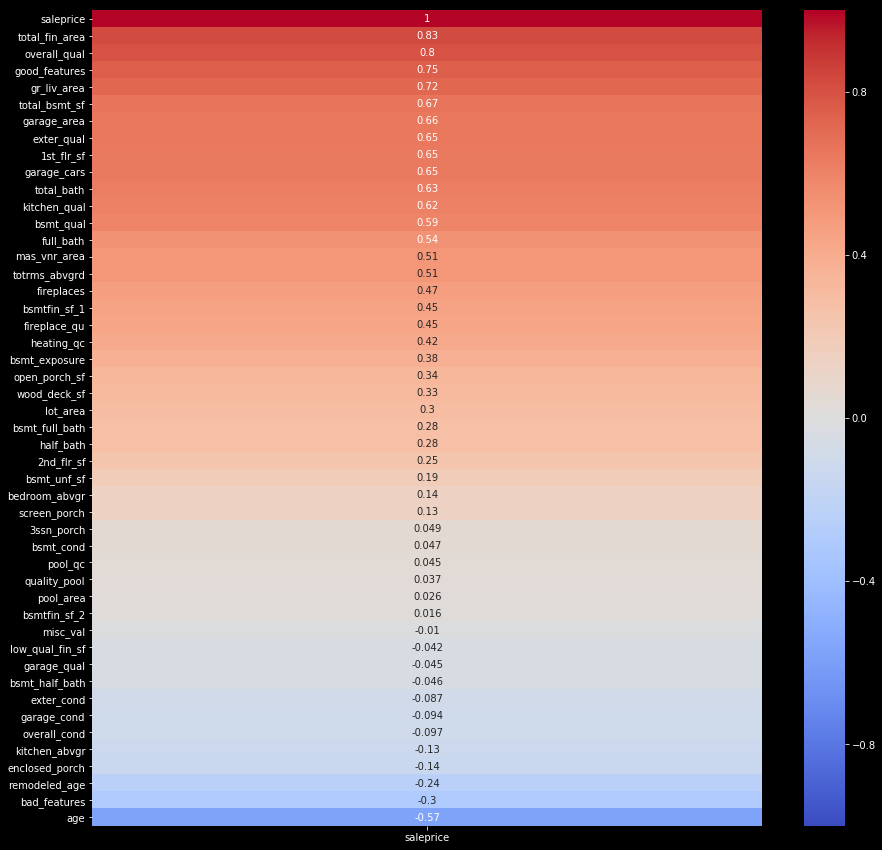

In [30]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 15))
plt.fontsize = 27
sns.heatmap(ames.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);

In [31]:
# Saving cleaned data to csv
ames.to_csv('../Datasets/Cleaned_Data/ames_clean_train.csv')
ames_test.to_csv('../Datasets/Cleaned_Data/ames_clean_test.csv')

<a id='Modelling-and-Fitting'></a>
# Modeling and Fitting:

#### Was inspired by some former classmates to create functions for modeling 

In [32]:
def standardize(X_train, X_test):
    ss = StandardScaler()
    X_train_sc = pd.DataFrame(ss.fit_transform(X_train))
    X_test_sc = pd.DataFrame(ss.transform(X_test))
    
    return X_train_sc, X_test_sc

In [33]:
def make_polys(features, X_train, X_test):    
    poly = PolynomialFeatures(include_bias=False)
    X_train_poly = poly.fit_transform(X_train[features])
    X_test_poly = poly.fit_transform(X_test[features])
    poly_col_names = poly.get_feature_names(features)
    X_test = pd.DataFrame(X_test_poly, columns=poly_col_names)
    X_train = pd.DataFrame(X_train_poly, columns=poly_col_names)
    
    return X_train, X_test

In [34]:
def test_data(model, X, y):
    x1, x2, y1, y2 = train_test_split(X, y, random_state=42)
    model.fit(x1, y1)
    train_pred = model.predict(x1)
    test_pred = model.predict(x2)
    print('Training Results')
    print('R2: ' + str(round(model.score(x1, y1), 3)))
    print('RMSE: ' + str(round(np.sqrt(mean_squared_error(y1, train_pred)), 3)))
    print()
    print('Testing Results')
    print('R2: ' + str(round(model.score(x2, y2), 3)))
    print('RMSE: ' + str(round(np.sqrt(mean_squared_error(y2, test_pred)), 3)))

In [35]:
# function that takes a list of problematic features and makes dummy variables
# modified from Brandon Walgraven's original function
def make_dummies(columns, X_train, X_test, train_data=ames, test_data=ames_test):
    train_dummies = pd.get_dummies(data=train_data, columns=columns, drop_first=True)
    test_dummies = pd.get_dummies(test_data, columns=columns, drop_first=True)
    
    missing_test_columns = set(train_dummies.columns) - set(test_dummies.columns)
    for col in missing_test_columns:
        test_dummies[col] = 0
    missing_train_columns = set(test_dummies.columns) - set(train_dummies.columns)
    for col in missing_train_columns:
        train_dummies[col] = 0
    return (X_train, X_test)

### Baseline Accuracy for Our Models

In [36]:
ames['saleprice'].mean() # The average cost of a home in Ames is $181,479.02. 

181479.01805758907

#### Only selected the features that were closely correlated to 'saleprice'

In [37]:
features = ['overall_qual',
            'good_features',
            'gr_liv_area',
            'exter_qual',
            'garage_area',
            'garage_cars',
            'total_bsmt_sf',
            '1st_flr_sf',
            'kitchen_qual',
            'bsmt_qual',
            'full_bath'
            ]

X_train = ames[features]
X_test = ames_test[features]
y = ames['saleprice']

### Standardize and Create Polynomial Features 

In [38]:
X_train_poly, X_test_poly = make_polys(features, X_train, X_test)

In [39]:
X_train_poly.shape

(2049, 77)

In [40]:
X_train, X_test = standardize(X_train, X_test)

In [41]:
X_train.shape

(2049, 11)

In [42]:
# Dummmied our variables that had nominal values
dummies = ['neighborhood', 
           'ms_zoning', 
           'house_style', 
           'bldg_type', 
           'lot_shape',
           'ms_subclass', 
           'mo_sold', 
           'functional', 
           'sale_type',
           'central_air',
           'foundation', 
           'yr_sold'
          ]

X_train, X_test = make_dummies(dummies, X_train_poly, X_test_poly)

In [43]:
# checking that shapes are the same size
print(X_train.shape, X_test.shape)

(2049, 77) (879, 77)


In [44]:
lr = LinearRegression()

In [45]:
test_data(lr, X_train, y)

Training Results
R2: 0.904
RMSE: 24565.554

Testing Results
R2: 0.882
RMSE: 27271.606


Cross-validated scores: [0.88058668 0.8857844  0.91322148 0.8754506  0.88073117 0.89132362]
Cross-Predicted Accuracy: 0.8873711014838732


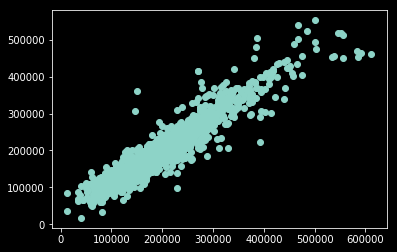

In [46]:
# Perform 6-fold cross validation
scores = cross_val_score(lr, X_train, y, cv=6)
print ('Cross-validated scores:', scores)
# Make cross validated predictions
predictions = cross_val_predict(lr, X_train, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

In [47]:
# training final model on all of the results
model_MLR = lr.fit(X_train, y)
MLR_train_pred = model_MLR.predict(X_test)

In [48]:
model_MLR.score(X_train, y) # sanity check 

0.904316883201729

In [49]:
MLR_train_pred.shape

(879,)

In [50]:
ames_test.shape

(879, 83)

In [51]:
ames_test['saleprice'] = MLR_train_pred 
MLR1_submit = ames_test[['id', 'saleprice']] # creates a dataframe with only two columns
                                            # our target and the provided ID's along with a pandas index column
MLR1_submit.set_index('id', inplace=True) # Makes our 'id' index so Kaggle will except our dataframe

In [52]:
MLR1_submit.head()

,saleprice
id,
2658,159619.340298
2718,188441.605957
2414,174756.032990
1989,128118.560630
625,189628.713230


In [53]:
MLR1_submit.to_csv('../datasets/MLR1_submit.csv') # Saves our submission to a .csv

### Create and Score a Simple Regression Model

In [54]:
# Regression model with a single feature
y = ames['saleprice']
X = ames[['overall_qual']]
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X, y, test_size=0.2)
print (X_train_simp.shape, y_train_simp.shape)
print (X_test_simp.shape, y_test_simp.shape)

(1639, 1) (1639,)
(410, 1) (410,)


In [55]:
lm = LinearRegression()

model = lm.fit(X_train_simp, y_train_simp)
predictions = lm.predict(X_test_simp)

0.642445671895405

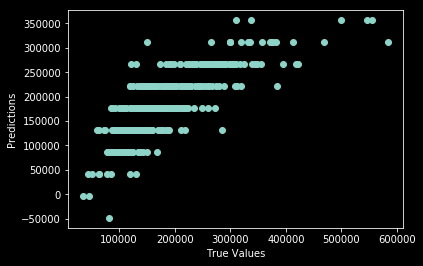

In [56]:
plt.scatter(y_test_simp, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

model.score(X_test_simp, y_test_simp)

#### 64% accuracy for fitting a model with a single, but highly correlated, metric. We can do better. 

### Create and Score a Multiple Linear Regression 

In [57]:
# taking top performers
features = ['overall_qual',
            'good_features',
            'gr_liv_area',
            'exter_qual',
            'garage_area',
            'garage_cars',
            'total_bsmt_sf',
            '1st_flr_sf',
            'kitchen_qual',
            'bsmt_qual',
            'full_bath'
            ]
y = ames['saleprice']
X = ames[features]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y)
print (X_train_multi.shape, y_train_multi.shape)
print (X_test_multi.shape, y_test_multi.shape)

(1536, 11) (1536,)
(513, 11) (513,)


In [58]:
lm = LinearRegression()

model = lm.fit(X_train_multi, y_train_multi)
predictions = lm.predict(X_test_multi)

0.8420393128106698

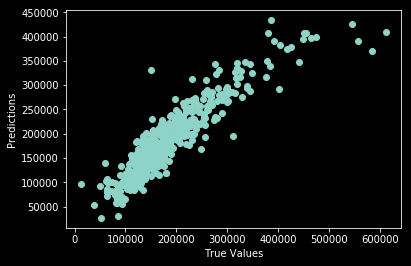

In [59]:
plt.scatter(y_test_multi, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

model.score(X_test_multi, y_test_multi)

#### 85% accuracy for fitting with multiple, featured metrics. 

<a id='Conclusions-and-Recommendations'></a>
## Conclusions and Recommendations:

#### Having a clear goal while feature engineering, data munging, and modeling are the key to accurate results with this dataset. Knowing what features were important and how to leverage them to have an affect on the target helped immensely. Grouping or clumping features together was fruitful and will be used again for other projects of this magnitude. Models where we utilized our engineered features fared much better than ones using only one variable. Creating dummy variables and scaling our variables also increased the accuracy of our predictions. 
#### Deliberately avoiding features that are inherently problematic, such as zip code or neighborhood, prevent our models from having a sociological bias. 
#### Future projects with this dataset could include using other models besides linear regression such as Ridge/Lasso/Elastic Net and utilizing a pipeline to deploy each of these hyperparameter tuners. 